# Credit Card Fraud Detection

## Importing the libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import self_utils as su
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def clean_dataset(df):
    # Replace infinity values with NaN and then drop rows with any NaN values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    return df


## Importing the dataset

In [31]:
df = pd.read_csv('/content/sample_data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Checking the discrepencies in the data and performing exploratory data analysis

In [32]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180351 entries, 0 to 180350
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    180351 non-null  float64
 1   V1      180351 non-null  float64
 2   V2      180351 non-null  float64
 3   V3      180351 non-null  float64
 4   V4      180351 non-null  float64
 5   V5      180351 non-null  float64
 6   V6      180351 non-null  float64
 7   V7      180351 non-null  float64
 8   V8      180351 non-null  float64
 9   V9      180350 non-null  float64
 10  V10     180350 non-null  float64
 11  V11     180350 non-null  float64
 12  V12     180350 non-null  float64
 13  V13     180350 non-null  float64
 14  V14     180350 non-null  float64
 15  V15     180350 non-null  float64
 16  V16     180350 non-null  float64
 17  V17     180350 non-null  float64
 18  V18     180350 non-null  float64
 19  V19     180350 non-null  float64
 20  V20     180350 non-null  float64
 21  V21     18

In [34]:
len(df)

180351

In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180350.000000,...,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000
mean,64311.566190,-0.145331,0.025240,0.430058,0.099535,-0.154862,0.054170,-0.071213,0.026522,0.015512,...,-0.022623,-0.070349,-0.020086,0.007205,0.080848,0.010398,0.002049,0.002168,88.248748,0.002018
std,30347.247811,1.871304,1.614101,1.411181,1.381971,1.352537,1.302884,1.212845,1.226281,1.145966,...,0.743755,0.676677,0.595308,0.600710,0.474494,0.489683,0.392520,0.307691,246.997674,0.044880
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42203.000000,-0.977400,-0.557176,-0.153895,-0.765620,-0.813617,-0.697945,-0.583844,-0.169208,-0.660590,...,-0.229104,-0.543503,-0.169513,-0.335673,-0.213247,-0.330643,-0.065823,-0.033913,5.680000,0.000000
50%,62895.000000,-0.147139,0.096708,0.580202,0.103124,-0.207890,-0.208333,-0.025300,0.051259,-0.077049,...,-0.050295,-0.055240,-0.033385,0.057135,0.124796,-0.059405,0.007672,0.020196,22.220000,0.000000
75%,81175.500000,1.194524,0.793880,1.272423,0.918396,0.406179,0.446929,0.474826,0.345506,0.635238,...,0.136487,0.385012,0.104860,0.418056,0.394112,0.269162,0.089462,0.078156,78.000000,0.000000
max,124501.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


### Checking the distribution of data

<Axes: xlabel='Class', ylabel='count'>

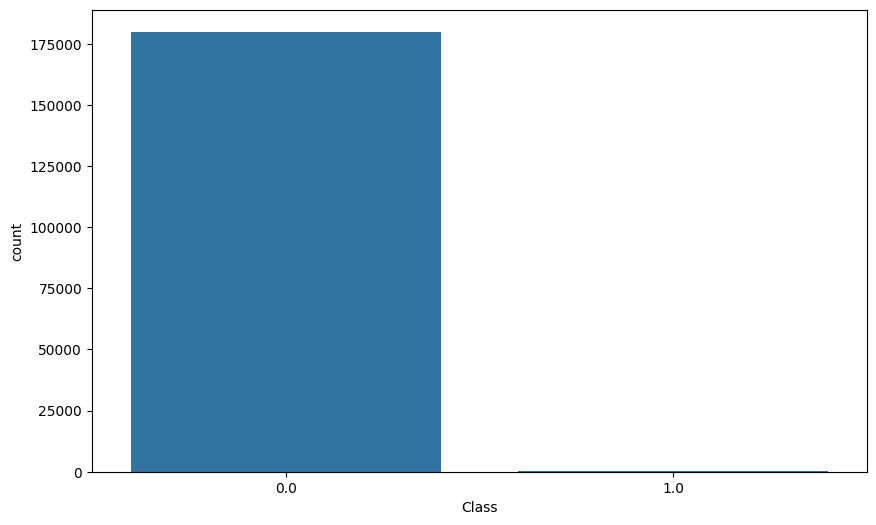

In [36]:
plt.figure(dpi=100, figsize=(10,6))
sns.countplot(data=df, x='Class')

### Checking the effect of `Amount` and `Time` columns of the dataset on `Class`

<Axes: xlabel='Amount', ylabel='Class'>

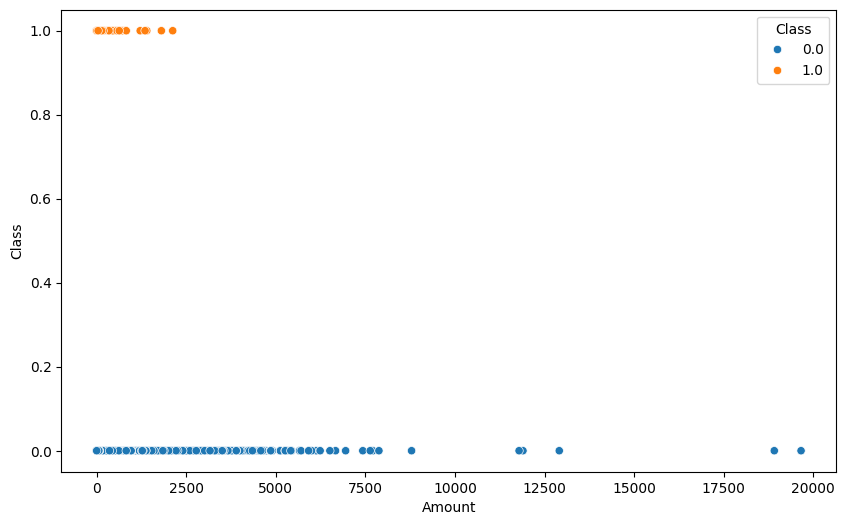

In [37]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class')

<Axes: xlabel='Time', ylabel='Class'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


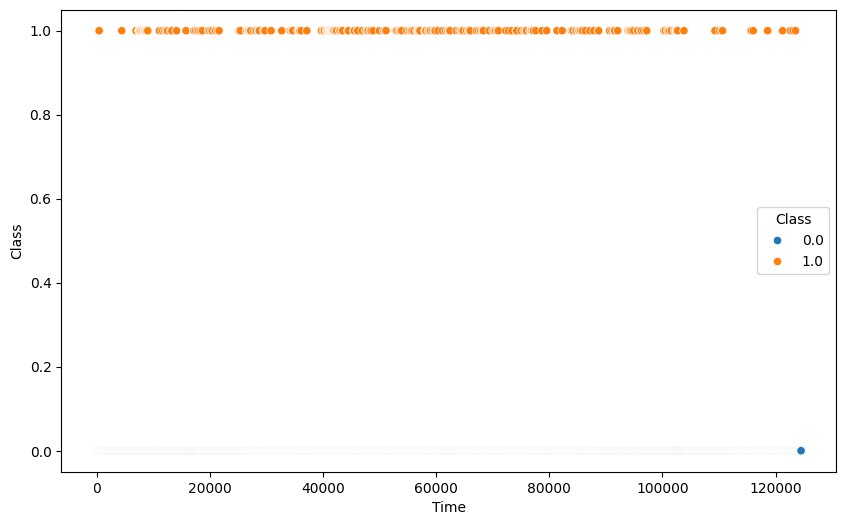

In [38]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', )

### Dropping the non impactful columns

In [39]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Scaling `Amount` feature for better results

In [40]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248470,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.346396,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.175768,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.142719,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073923,0.0


### Cleaning the dataset by removing any `NaN` or `infinite` values

In [41]:
# import self_utils as su
df = su.clean_dataset(df)

### Checking the Distribution of various features of our dataset

<Figure size 640x480 with 0 Axes>

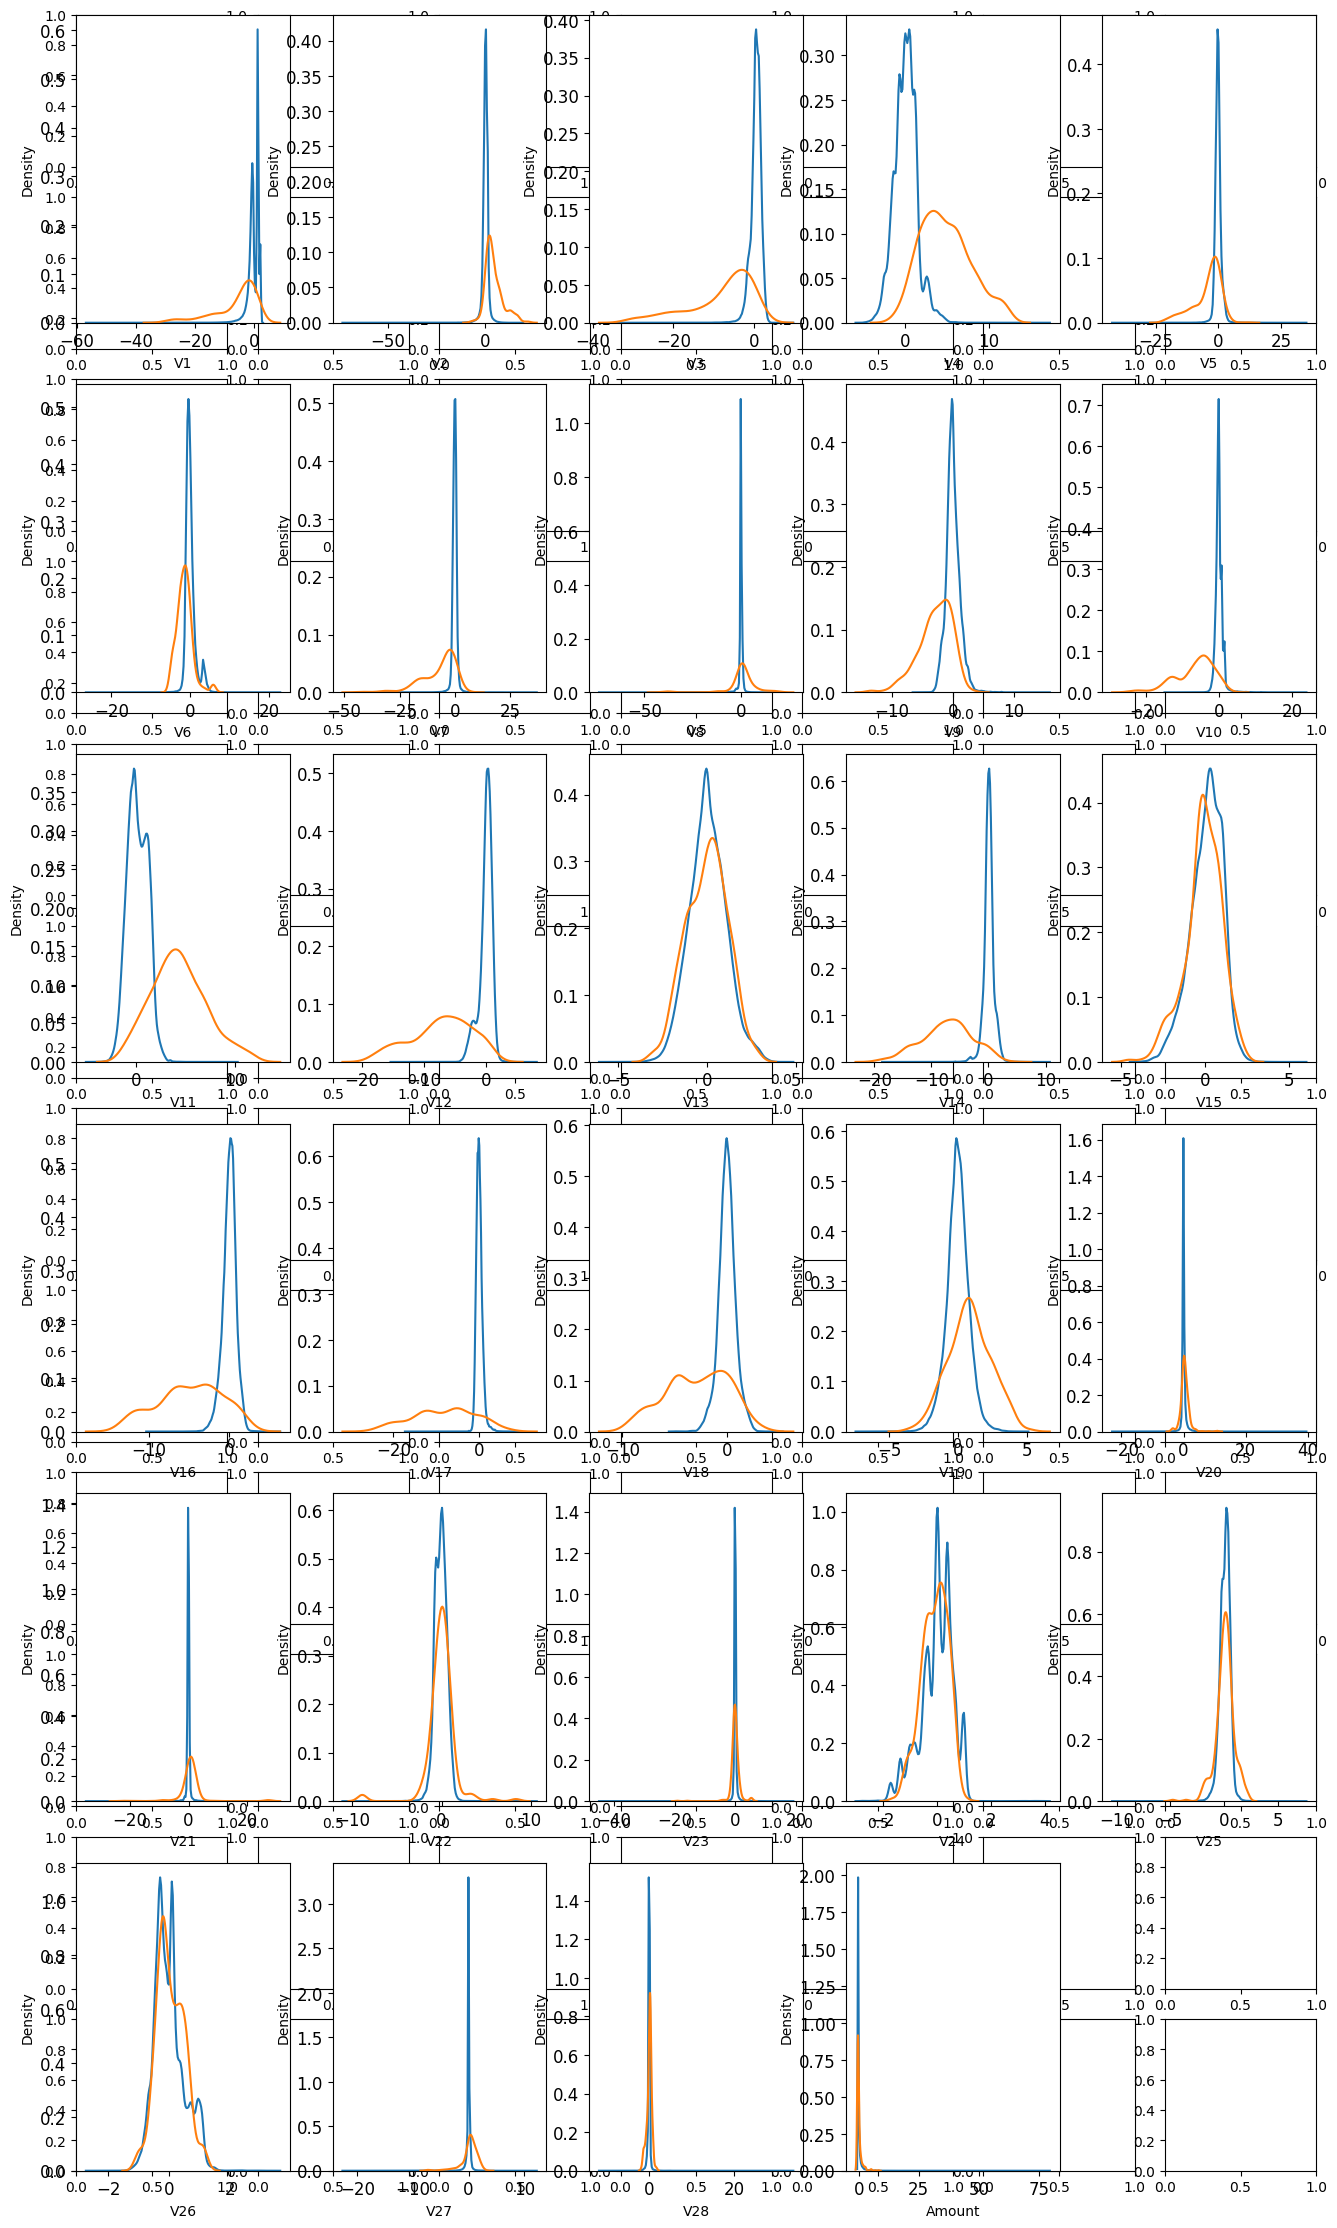

In [42]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show();

## Preparing the dataset for training

In [51]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

### Splitting the dataset into training and validation sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

108210

### Checking skewness and using a transformer to mitigate it

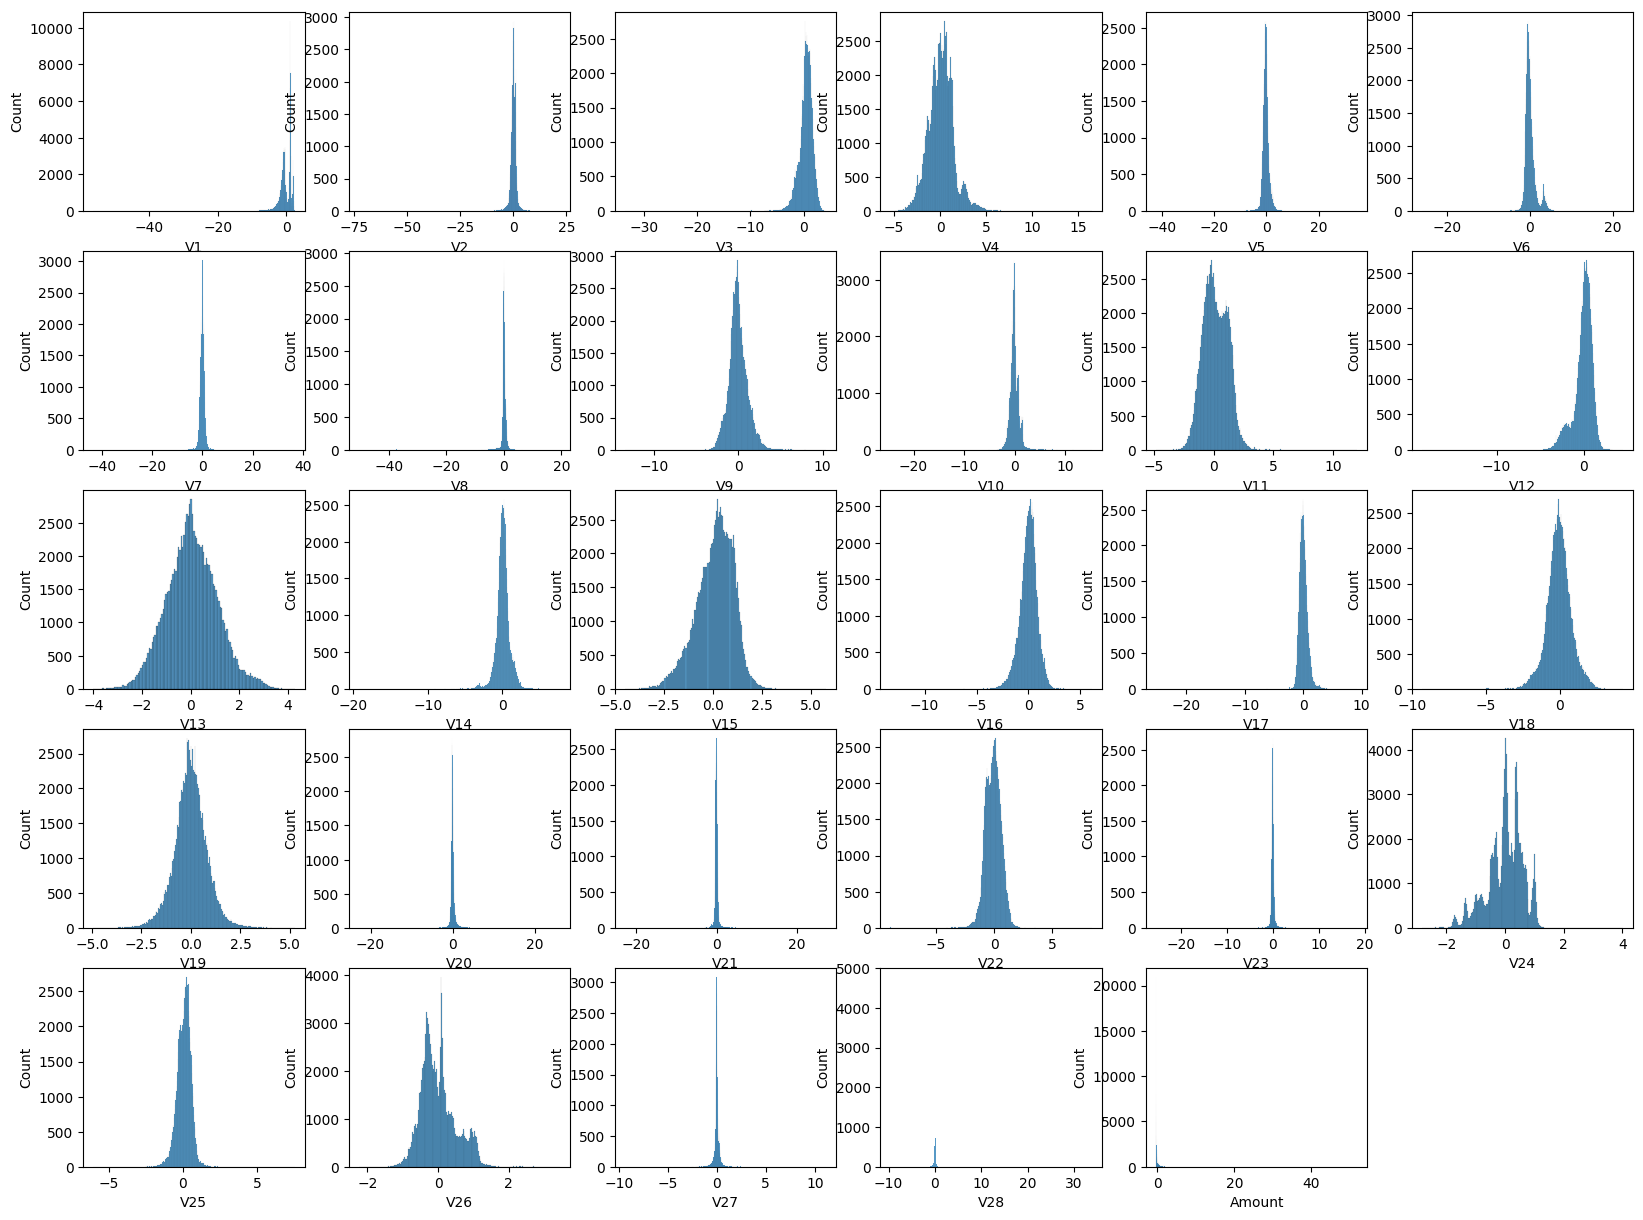

In [53]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

In [54]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col] = pt.fit_transform(X_train)
X_test[col] = pt.transform(X_test)

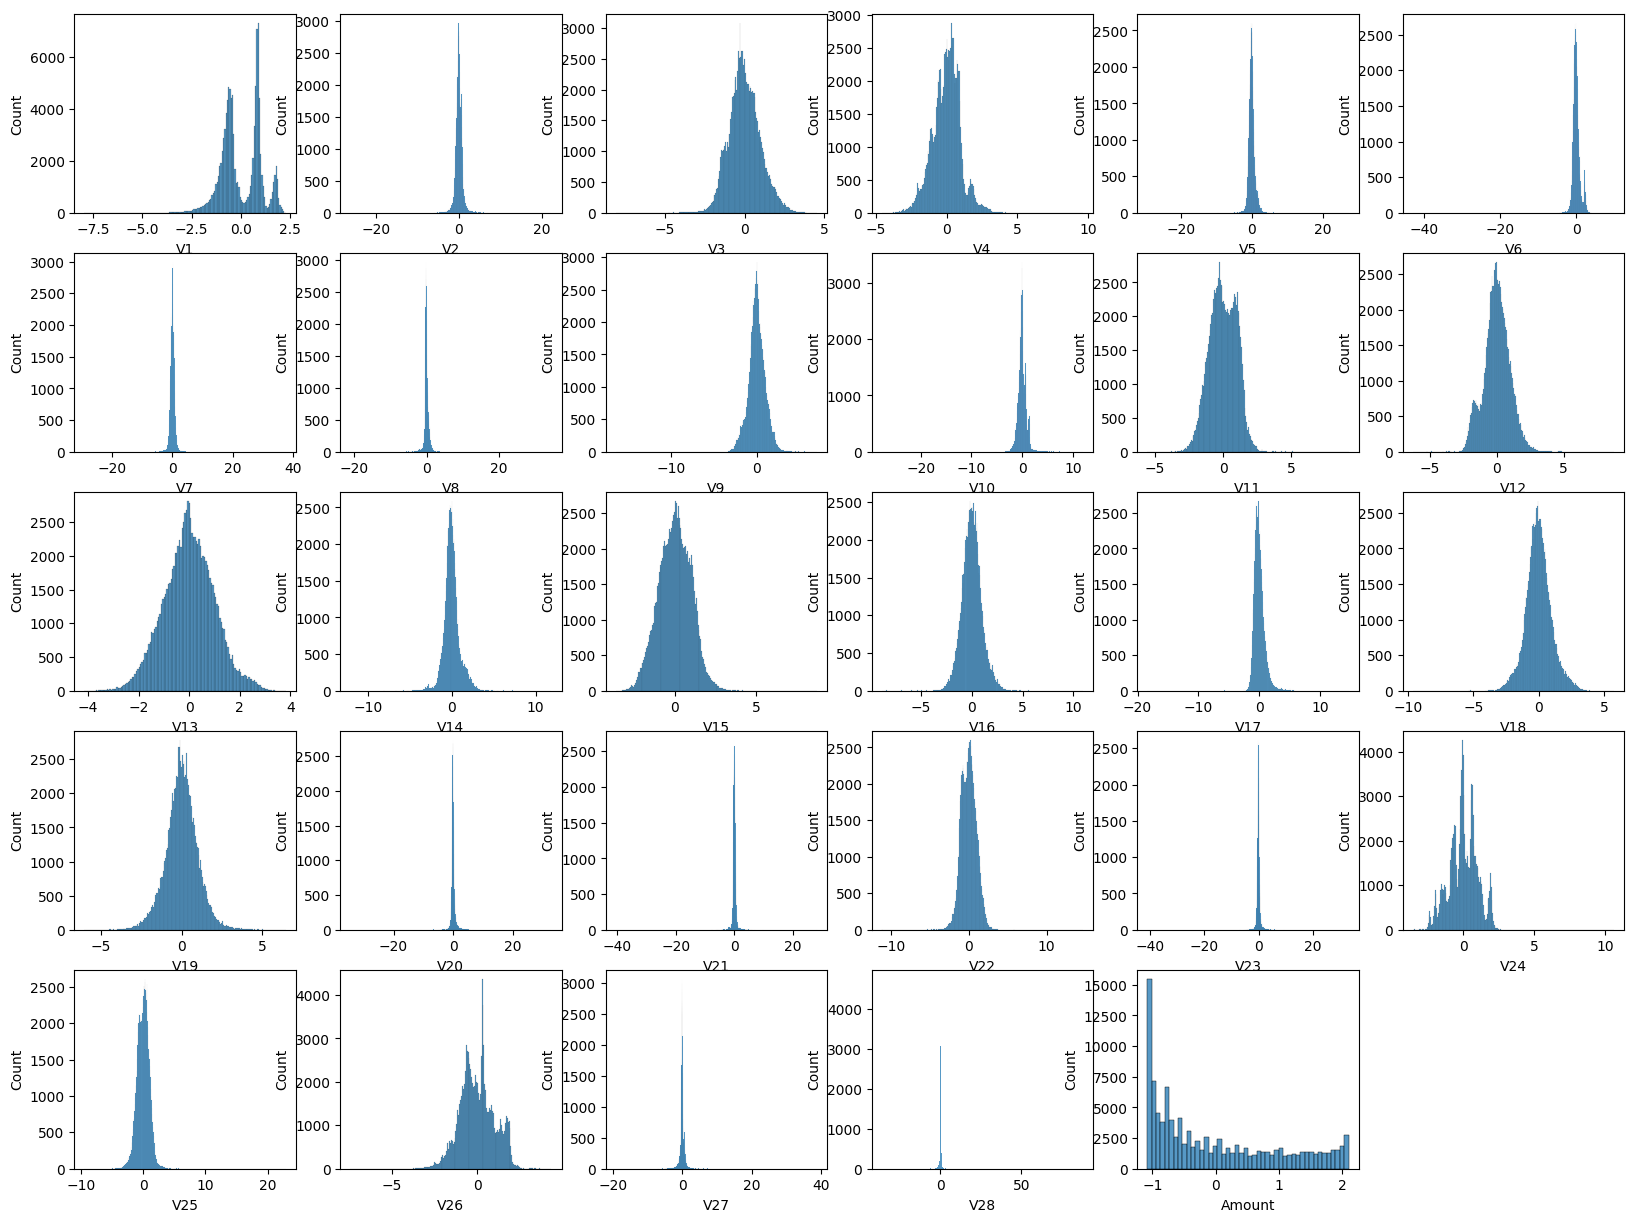

In [55]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

### Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)

In [56]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0.0: 108002, 1.0: 208})
After performing smote :  Counter({0.0: 108002, 1.0: 108002})


## Testing various models on the dataset

### 1.1. Logistic Regression without synthetic data

In [57]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1

0.998932630995287

#### Confusion Matrix

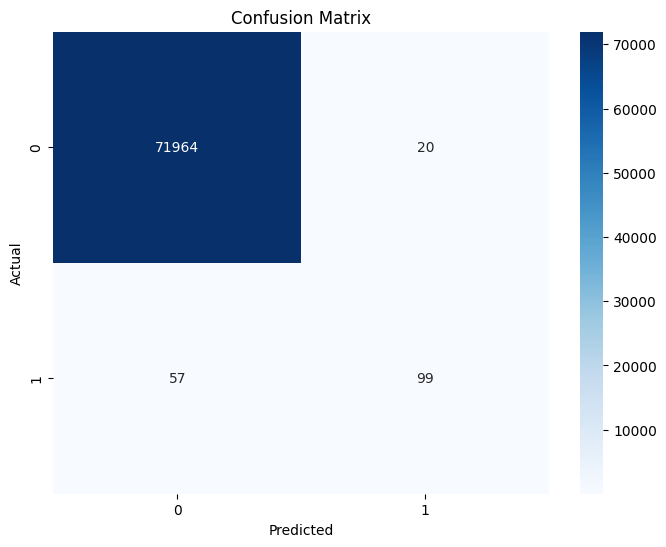

In [58]:
su.make_confusion_matrix(y_test, y_pred_ws_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [59]:
res11 = su.calculate_results(y_test, y_pred_ws_1)
res11

{'accuracy': 99.8932630995287,
 'f1': 72.0,
 'precision': 83.19327731092437,
 'recall': 63.46153846153846}

### 1.2 Logistic Regression with synthetic data

In [60]:
model_s_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.9765040199611866

#### Confusion Matrix

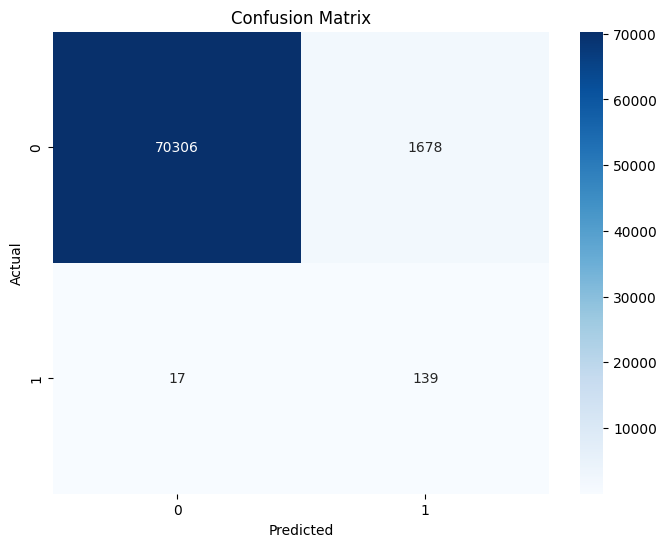

In [61]:
su.make_confusion_matrix(y_test, y_pred_s_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [62]:
res12 = su.calculate_results(y_test, y_pred_s_1)
res12

{'accuracy': 97.65040199611866,
 'f1': 14.09021794221997,
 'precision': 7.649972482113373,
 'recall': 89.1025641025641}

### 2.1. Decision Tree Classifier without synthetic data

In [63]:
model_ws_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

0.9993623509841973

#### Confusion Matrix

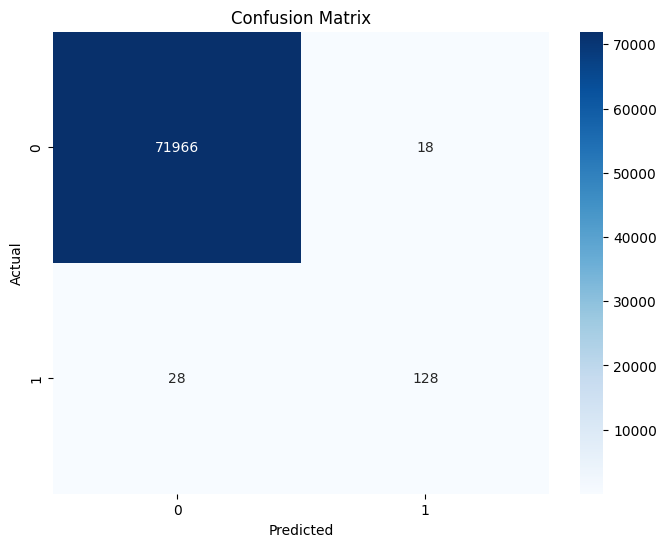

In [64]:
su.make_confusion_matrix(y_test, y_pred_ws_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [66]:
res21 = su.calculate_results(y_test, y_pred_ws_2)
res21

{'accuracy': 99.93623509841973,
 'f1': 84.76821192052981,
 'precision': 87.67123287671232,
 'recall': 82.05128205128204}

### 2.2. Decision Tree Classifier with synthetic data

In [65]:
model_s_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9469919600776269

#### Confusion Matrix

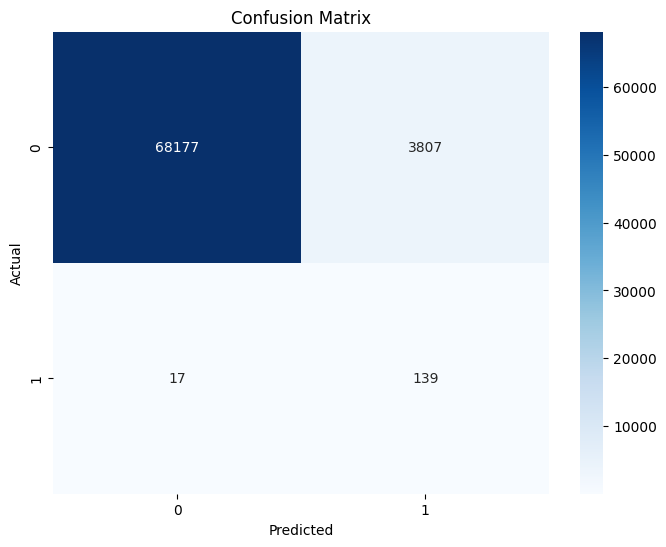

In [67]:
su.make_confusion_matrix(y_test, y_pred_s_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [68]:
res22 = su.calculate_results(y_test, y_pred_s_2)
res22

{'accuracy': 94.69919600776268,
 'f1': 6.777181862506095,
 'precision': 3.5225544855549926,
 'recall': 89.1025641025641}

### 3.1. Naive Bayes Classifier without synthetic data

In [69]:
model_ws_3 = GaussianNB()
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.9785833102301081

#### Confusion Matrix

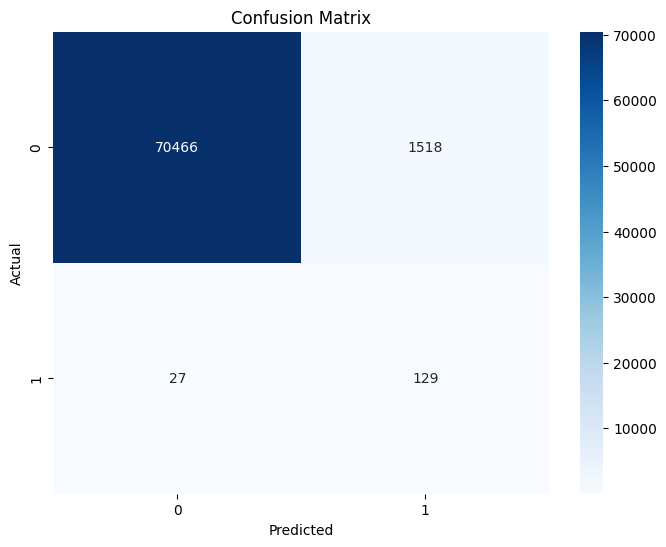

In [70]:
su.make_confusion_matrix(y_test, y_pred_ws_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [71]:
res31 = su.calculate_results(y_test, y_pred_ws_3)
res31

{'accuracy': 97.85833102301082,
 'f1': 14.309484193011649,
 'precision': 7.832422586520947,
 'recall': 82.6923076923077}

### 3.2. Naive Bayes Classifier with synthetic data

In [72]:
model_s_3 = GaussianNB()
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9755336845023566

#### Confusion Matrix

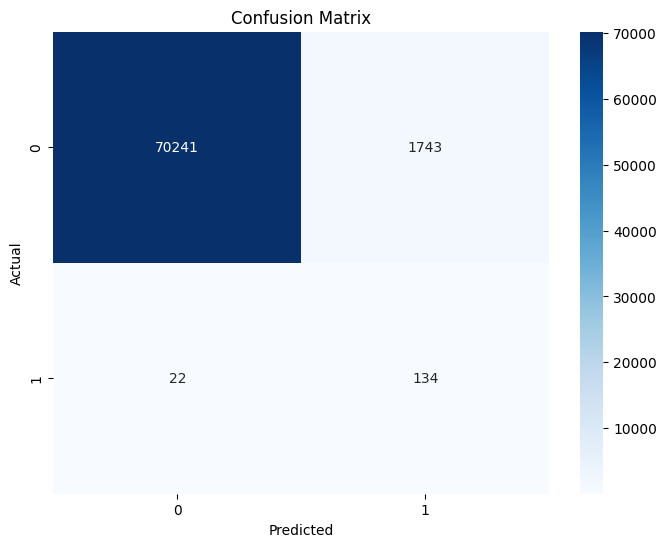

In [73]:
su.make_confusion_matrix(y_test, y_pred_s_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [74]:
res32 = su.calculate_results(y_test, y_pred_s_3)
res32

{'accuracy': 97.55336845023565,
 'f1': 13.182488932611905,
 'precision': 7.13905167820991,
 'recall': 85.8974358974359}

### 4.1. K Nearest Neighbors Classifier without synthetic data

In [75]:
model_ws_4 = KNeighborsClassifier(n_neighbors=3)
model_ws_4.fit(X_train, y_train)
y_pred_ws_4 = model_ws_4.predict(X_test)
acc_ws_4 = accuracy_score(y_test, y_pred_ws_4)
acc_ws_4

0.9994732464652065

#### Confusion Matrix

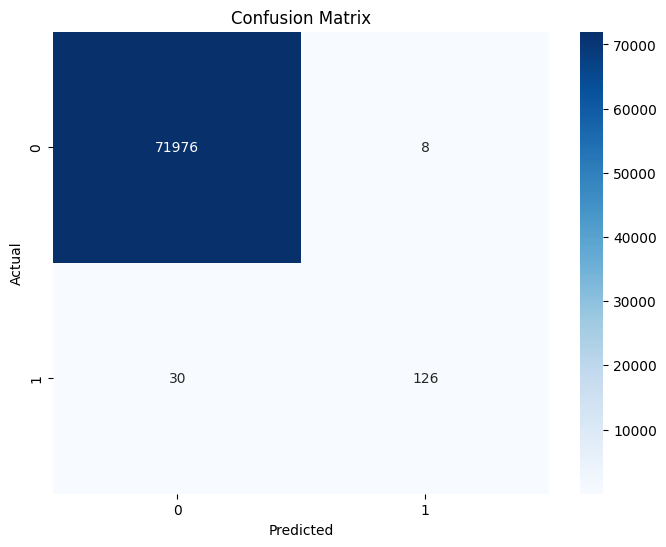

In [76]:
su.make_confusion_matrix(y_test, y_pred_ws_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [77]:
res41 = su.calculate_results(y_test, y_pred_ws_4)
res41

{'accuracy': 99.94732464652066,
 'f1': 86.89655172413792,
 'precision': 94.02985074626866,
 'recall': 80.76923076923077}

### 4.2. K Nearest Neighbors Classifier with synthetic data

In [78]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9985860826171333

#### Confusion Matrix

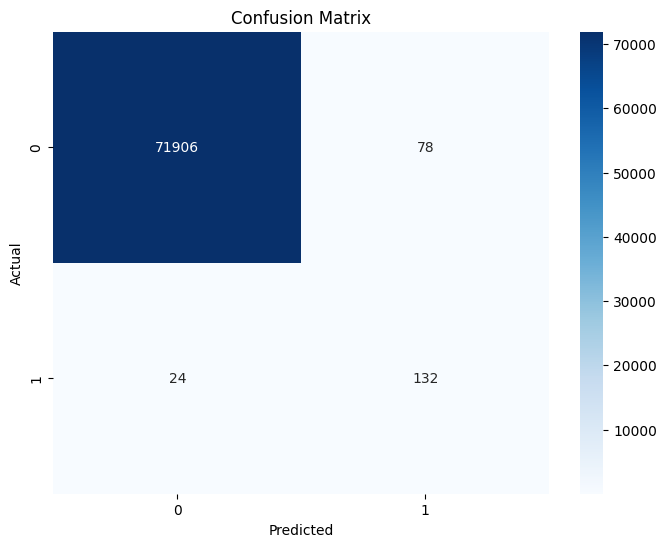

In [79]:
su.make_confusion_matrix(y_test, y_pred_s_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [80]:
res42 = su.calculate_results(y_test, y_pred_s_4)
res42

{'accuracy': 99.85860826171333,
 'f1': 72.1311475409836,
 'precision': 62.857142857142854,
 'recall': 84.61538461538461}

### 5.1. Random Forest Classifier without synthetic data

In [81]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

0.9994455225949542

#### Confusion Matrix

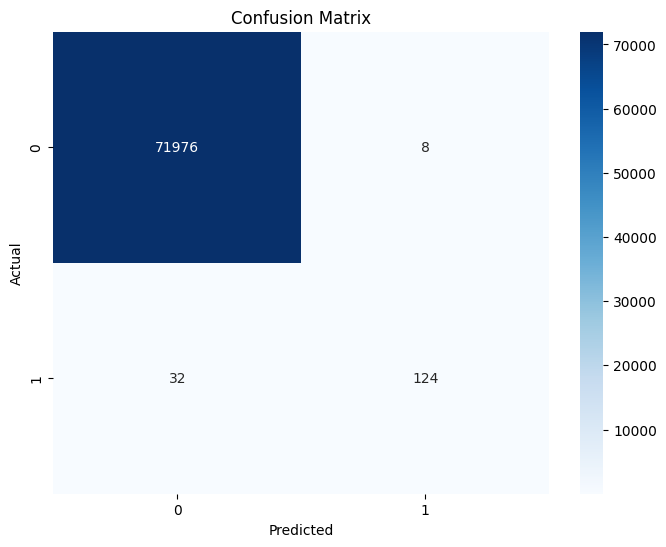

In [82]:
su.make_confusion_matrix(y_test, y_pred_ws_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [83]:
res51 = su.calculate_results(y_test, y_pred_ws_5)
res51

{'accuracy': 99.94455225949542,
 'f1': 86.11111111111111,
 'precision': 93.93939393939394,
 'recall': 79.48717948717949}

### 5.2. Random Forest Classifier with synthetic data

In [84]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9973800942611588

#### Confusion Matrix

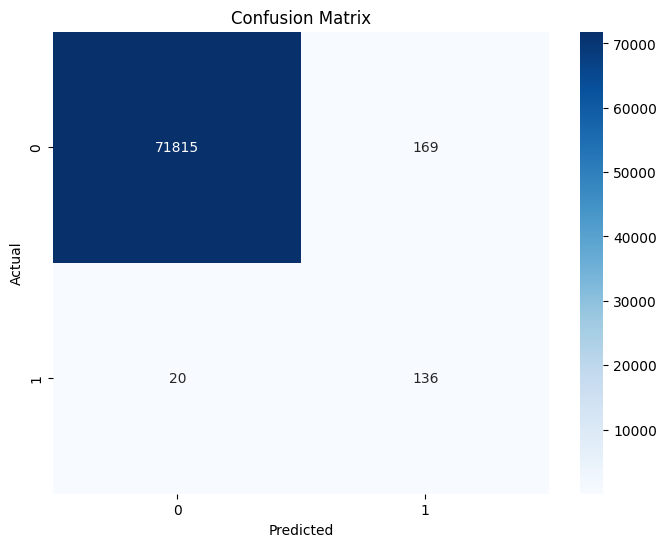

In [85]:
su.make_confusion_matrix(y_test, y_pred_s_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [86]:
res52 = su.calculate_results(y_test, y_pred_s_5)
res52

{'accuracy': 99.73800942611588,
 'f1': 59.00216919739696,
 'precision': 44.59016393442623,
 'recall': 87.17948717948718}

### 6.1. Support Vector Classifier without synthetic data

In [87]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

0.9992791793734406

#### Confusion Matrix


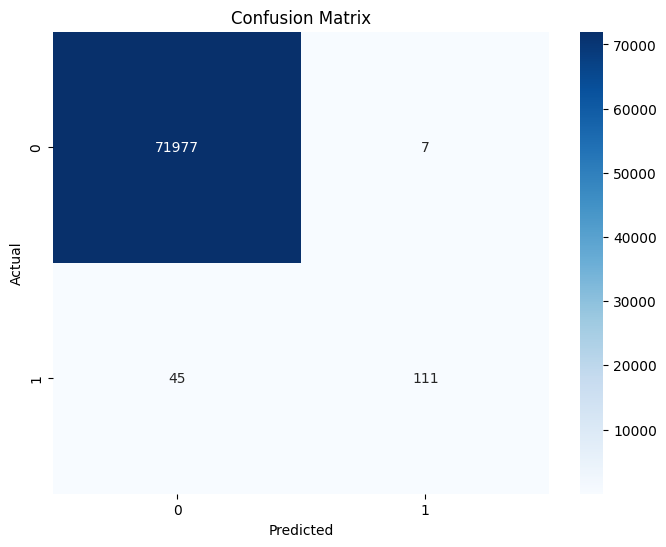

In [88]:
su.make_confusion_matrix(y_test, y_pred_ws_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [89]:
res61 = su.calculate_results(y_test, y_pred_ws_6)
res61

{'accuracy': 99.92791793734406,
 'f1': 81.02189781021897,
 'precision': 94.0677966101695,
 'recall': 71.15384615384616}

### 6.2. Support Vector Classifier with synthetic data

In [ ]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

#### Confusion Matrix

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res62 = su.calculate_results(y_test, y_pred_s_6)
res62

### 7.1. XGBoost Classifier without synthetic data

In [ ]:
model_ws_7 = XGBClassifier()
model_ws_7.fit(X_train, y_train)
y_pred_ws_7 = model_ws_7.predict(X_test)
acc_ws_7 = accuracy_score(y_test, y_pred_ws_7)
acc_ws_7

#### Confusion Matrix

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res71 = su.calculate_results(y_test, y_pred_ws_7)
res71

### 7.2. XGBoost Classifier with synthetic data

In [ ]:
model_s_7 = XGBClassifier()
model_s_7.fit(X_train_smote, y_train_smote)
y_pred_s_7 = model_s_7.predict(X_test)
acc_s_7 = accuracy_score(y_test, y_pred_s_7)
acc_s_7

#### Confusion Matrix

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res72 = su.calculate_results(y_test, y_pred_s_7)
res72

# Comparing precision, accuracy f1 score and recall of all the models

In [ ]:
dp = pd.DataFrame([res11,res12,res21,res22,res31,res32,res41,res42,res51,res52,res61,res62,res71,res72],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2','5.1','5.2','6.1','6.2','7.1','7.2'])

In [ ]:
dp

In [49]:
# Create a dummy self_utils.py file with the required functions
%%writefile self_utils.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def clean_dataset(df):
    # Replace infinity values with NaN and then drop rows with any NaN values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    return df.astype(np.float64)

def make_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

def calculate_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    results = {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}
    return results

Overwriting self_utils.py


The `self_utils.py` file has been created with the necessary functions. You can now run the import cell again.

In [50]:
# Clean the dataset by replacing infinity with NaN and dropping rows with NaN
df_cleaned = df.copy().replace([np.inf, -np.inf], np.nan).dropna()

print("NaN values after cleaning:")
print(df_cleaned.isnull().sum().sum())
print("\nInfinite values after cleaning:")
print(np.isinf(df_cleaned).sum().sum())

# You can now proceed with the rest of your notebook using df_cleaned

NaN values after cleaning:
0

Infinite values after cleaning:
0
